try different samples of data for the train test split settings 

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# transformations
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
score_dict = {}
def score_me(mn, mc, pn, y_test):
    """ 
    mn : the model name you want to have (ie. mn='Linear Regression')
    mc : the variable name for the model (ie. mc=linear_regression)
    pn : predictor variable name (ie. pn=y_pred)
    """
    global model_name
    model_name = {}
    model_name['Accuracy Score'] = round(accuracy_score(y_test, pn), 4)
    model_name['Micro F1 Score'] = round(f1_score(y_test, pn, average='micro'), 4)
    model_name['Macro F1 Score'] = round(f1_score(y_test, pn, average='macro'), 4)
    model_name['Weighted F1 Score'] = round(f1_score(y_test, pn, average='weighted'), 4)
    model_name['Micro Precision Score'] = round(precision_score(y_test, pn, average='micro'), 4)
    model_name['Macro Precision Score'] = round(precision_score(y_test, pn, average='macro'), 4)
    model_name['Weighted Precision Score'] = round(precision_score(y_test, pn, average='weighted'), 4)
    model_name['Micro Recall Score'] = round(recall_score(y_test, pn, average='micro'), 4)
    model_name['Macro Recall Score'] = round(recall_score(y_test, pn, average='macro'), 4)
    model_name['Weighted Recall Score'] = round(recall_score(y_test, pn, average='weighted'), 4)
    score_dict[mn] = model_name 
    print(classification_report(y_test, pn), '\n', '\n')
    
    plt.figure(figsize = (20, 8))
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pn)), annot=True, fmt='g', annot_kws={"size": 15})
    plt.title(str(mn) +' Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Labels')
    plt.tight_layout()

    plt.show()


In [3]:

def Decision_Tree(X_train, y_train, X_test, y_test):
    global dctc
    dctc_start = time.time()
    dctc= DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
    dctc_predictions = dctc.predict(X_test)
    score_me('Decision Tree Classifier', dctc, dctc_predictions, y_test)

    dctc_end = time.time()
    compute_time_dctc = dctc_end - dctc_start
    model_name['Run Time(secs)'] = round(compute_time_dctc, 3)
    print('Scores:', score_dict['Decision Tree Classifier'])


In [4]:
def RF_Feature_Importance(X_train, y_train, X_test, y_test):    
    rfc_feature_importances = pd.DataFrame(rfc.feature_importances_, index = X_train.columns,
                                         columns = ['Importance']).sort_values('Importance', ascending = False)
    plt.figure(figsize = (20, 8))
    sns.barplot(x = 'Importance', y = rfc_feature_importances.index,
            data = rfc_feature_importances)
    plt.title('Random Forest Classifier Feature Importances', fontsize = 14)
    plt.xlabel('Importance Value', fontsize = 12)
    plt.show()
    
    

def Feature_Optimization_RF(X_train, y_train, X_test, y_test ):
    results = pd.DataFrame(columns = ['Number of Features', 'Accuracy Score','Micro F1 Score','Macro F1 Score', 'Weighted F1 Score', 'Micro Precision Score', 'Macro Precision Score', 
                                     'Weighted Precision Score', 'Micro Recall Score', 'Macro Recall Score', 'Weighted Recall Score'])


    for index in np.arange(len(X_train.columns)):
        sel = RFE(RandomForestClassifier(random_state = 42, n_jobs = -1), n_features_to_select = index + 1)
        sel.fit(X_train, y_train)
        x_train_rfe = sel.transform(X_train)
        x_test_rfe = sel.transform(X_test)
        model = RandomForestClassifier(n_estimators = 50, random_state = 42, n_jobs = -1)
        model.fit(x_train_rfe, y_train)
        results.loc[index] = [index + 1,
                              round(accuracy_score(y_test, model.predict(x_test_rfe)), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='weighted'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='weighted'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='weighted'), 4)]
        return results 




In [5]:

def Random_Forest(X_train, y_train, X_test, y_test):
    global rfc
    '''returns rf_results dataframe which must be saved '''
    rfc_start = time.time()
    rfc = RandomForestClassifier(n_estimators=100, random_state = 42, n_jobs = -1).fit(X_train, y_train)
    rfc_predictions = rfc.predict(X_test)
    score_me('Random Forest Classifier', rfc, rfc_predictions, y_test)

    rfc_end = time.time()
    compute_time_rfc = rfc_end - rfc_start
    model_name['Run Time(secs)'] = round(compute_time_rfc, 3)
    print('Scores:', score_dict['Random Forest Classifier'])
    

In [6]:
def Gradient_Boosting_Classifier(X_train, y_train, X_test, y_test):
    global gbc
    gbc_start = time.time()


    gbc = GradientBoostingClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)

    gbc_predictions = gbc.predict(X_test)
    score_me('Gradient Boosting Classifier', gbc, gbc_predictions, y_test)

    gbc_end = time.time()
    compute_time_gbc = gbc_end - gbc_start
    model_name['Run Time(secs)'] = round(compute_time_gbc, 3)
    print('Scores:', score_dict['Gradient Boosting Classifier'])


In [7]:
def XG_Boost_Classifier(X_train, y_train, X_test, y_test):
    global xgc
    xgc_start = time.time()


    xgc = OneVsRestClassifier(XGBClassifier()).fit(X_train, y_train)

    xgc_predictions = xgc.predict(X_test)
    score_me('XG-Boost Classifier', xgc, xgc_predictions, y_test)

    xgc_end = time.time()
    compute_time_xgc = xgc_end - xgc_start
    model_name['Run Time(secs)'] = round(compute_time_xgc, 3)
    print('Scores:', score_dict['XG-Boost Classifier'])


In [8]:
def KNN_Classifier(X_train, y_train, X_test, y_test):
    global knnc
    knn_start = time.time()
    
    knnc = KNeighborsClassifier(n_neighbors=7, n_jobs = -1).fit(X_train, y_train)
    knn_predictions = knnc.predict(X_test)
    score_me('K-Neighbors Classifier', knnc, knn_predictions, y_test)

    knn_end = time.time()
    compute_time_knn = knn_end - knn_start
    model_name['Run Time(secs)'] = round(compute_time_knn, 3)
    print('Scores:', score_dict['K-Neighbors Classifier'])


In [9]:
def train_models(df, target_column, RF_O=False):
    X_train, X_test, y_train, y_test = train_test_split(df, target_column, random_state=42, test_size=0.25)
    
    Decision_Tree(X_train, y_train, X_test, y_test)
    
    Gradient_Boosting_Classifier(X_train, y_train, X_test, y_test)
    
    XG_Boost_Classifier(X_train, y_train, X_test, y_test)
    
    KNN_Classifier(X_train, y_train, X_test, y_test)
    Random_Forest(X_train, y_train, X_test, y_test)
    

    # shows a bar chart of feature importance
    RF_Feature_Importance(X_train, y_train, X_test, y_test )
    # returns a dataframe of how features affect the performance of the RF model 
    results = Feature_Optimization_RF(X_train, y_train, X_test, y_test )
    
    return pd.DataFrame.from_dict(score_dict)   

In [10]:
score_dict_test_df = {}
def score_me_test_df(mn_t, mc_t, pn_t, y_test):
    """ 
    mn : the model name you want to have (ie. mn='Linear Regression')
    mc : the variable name for the model (ie. mc=linear_regression)
    pn : predictor variable name (ie. pn=y_pred)
    """
    global model_name_ts
    model_name = {}
    model_name['Accuracy Score'] = round(accuracy_score(y_test, pn_t), 4)
    model_name['Micro F1 Score'] = round(f1_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro F1 Score'] = round(f1_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted F1 Score'] = round(f1_score(y_test, pn_t, average='weighted'), 4)
    model_name['Micro Precision Score'] = round(precision_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro Precision Score'] = round(precision_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted Precision Score'] = round(precision_score(y_test, pn_t, average='weighted'), 4)
    model_name['Micro Recall Score'] = round(recall_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro Recall Score'] = round(recall_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted Recall Score'] = round(recall_score(y_test, pn_t, average='weighted'), 4)
    score_dict_test_df[mn_t] = model_name 
    print(classification_report(y_test, pn_t), '\n', '\n')
    
    plt.figure(figsize = (20, 8))
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pn_t)), annot=True, fmt='g', annot_kws={"size": 15})
    plt.title(str(mn_t) +' Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Labels')
    plt.tight_layout()

    plt.show()


In [11]:
def run_test_df(the_target_column, the_test_data):
    target_column = the_target_column
    set_to_test = the_test_data
    model_names = {'Decision Tree Classifier':[dctc, dctc.predict(set_to_test)],'Random Forest Classifier':[rfc, rfc.predict(set_to_test)],
                   'Gradient Boosting Classifier':[gbc, gbc.predict(set_to_test)],'XG-Boost Classifier':[xgc, xgc.predict(set_to_test)],
                   'K-Neighbors Classifier':[knnc, knnc.predict(set_to_test)]}
    for models in model_names:
        score_me_test_df(mn_t=models, mc_t=model_names[models][0], pn_t=model_names[models][1], y_test=the_target_column)

    model_results_ts = pd.DataFrame.from_dict(score_dict_test_df)
    return model_results_ts


              precision    recall  f1-score   support

           0       0.70      0.68      0.69      9971
           1       0.91      0.94      0.93      9849
           2       0.96      0.98      0.97      9909
           3       0.98      1.00      0.99      9721
           4       0.98      1.00      0.99      9860
           5       0.89      0.83      0.86      9651
           6       0.68      0.69      0.68      9789

    accuracy                           0.87     68750
   macro avg       0.87      0.87      0.87     68750
weighted avg       0.87      0.87      0.87     68750
 
 



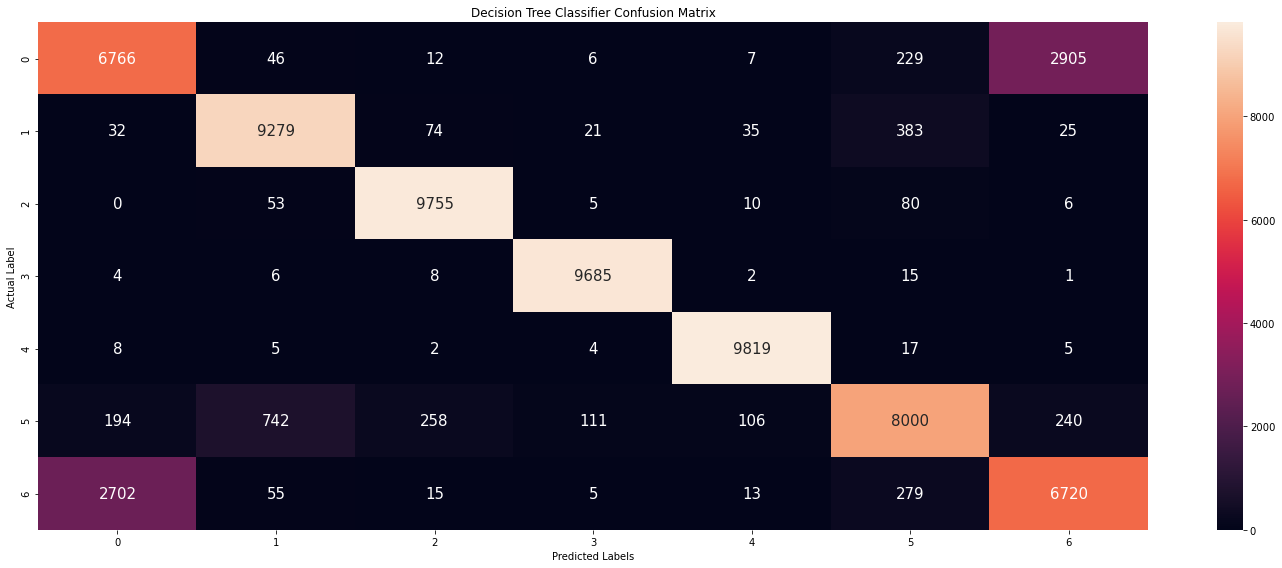

Scores: {'Accuracy Score': 0.8731, 'Micro F1 Score': 0.8731, 'Macro F1 Score': 0.8725, 'Weighted F1 Score': 0.8723, 'Micro Precision Score': 0.8731, 'Macro Precision Score': 0.8723, 'Weighted Precision Score': 0.872, 'Micro Recall Score': 0.8731, 'Macro Recall Score': 0.8732, 'Weighted Recall Score': 0.8731, 'Run Time(secs)': 1.385}
              precision    recall  f1-score   support

           0       0.65      0.87      0.74      9971
           1       0.33      0.31      0.32      9849
           2       0.43      0.27      0.33      9909
           3       0.47      0.61      0.53      9721
           4       0.43      0.64      0.51      9860
           5       0.41      0.22      0.29      9651
           6       0.76      0.59      0.66      9789

    accuracy                           0.50     68750
   macro avg       0.50      0.50      0.48     68750
weighted avg       0.50      0.50      0.48     68750
 
 



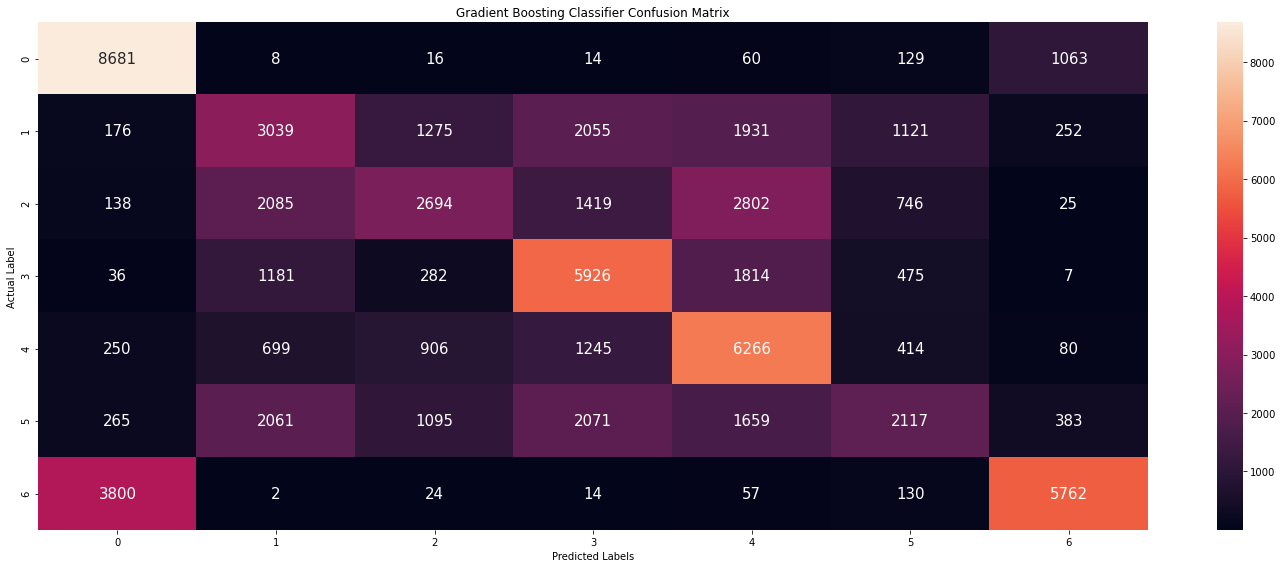

Scores: {'Accuracy Score': 0.5016, 'Micro F1 Score': 0.5016, 'Macro F1 Score': 0.4841, 'Weighted F1 Score': 0.4848, 'Micro Precision Score': 0.5016, 'Macro Precision Score': 0.4974, 'Weighted Precision Score': 0.4976, 'Micro Recall Score': 0.5016, 'Macro Recall Score': 0.5006, 'Weighted Recall Score': 0.5016, 'Run Time(secs)': 15.228}
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      9971
           1       0.83      0.81      0.82      9849
           2       0.87      0.95      0.91      9909
           3       0.92      0.99      0.95      9721
           4       0.95      0.99      0.97      9860
           5       0.83      0.67      0.74      9651
           6       0.87      0.63      0.73      9789

    accuracy                           0.85     68750
   macro avg       0.85      0.85      0.85     68750
weighted avg       0.85      0.85      0.85     68750
 
 



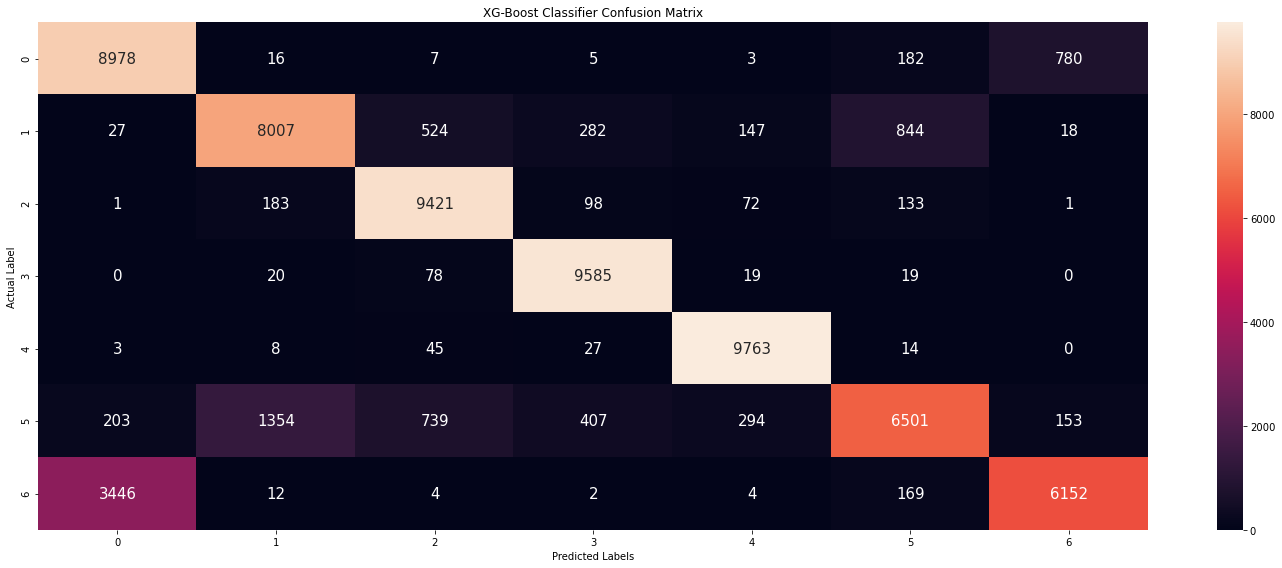

Scores: {'Accuracy Score': 0.8496, 'Micro F1 Score': 0.8496, 'Macro F1 Score': 0.8454, 'Weighted F1 Score': 0.8456, 'Micro Precision Score': 0.8496, 'Macro Precision Score': 0.8537, 'Weighted Precision Score': 0.8534, 'Micro Recall Score': 0.8496, 'Macro Recall Score': 0.8489, 'Weighted Recall Score': 0.8496, 'Run Time(secs)': 27.331}
              precision    recall  f1-score   support

           0       0.62      0.70      0.65      9971
           1       0.89      0.96      0.92      9849
           2       0.94      0.99      0.96      9909
           3       0.96      1.00      0.98      9721
           4       0.97      1.00      0.98      9860
           5       0.88      0.81      0.84      9651
           6       0.68      0.50      0.57      9789

    accuracy                           0.85     68750
   macro avg       0.85      0.85      0.85     68750
weighted avg       0.85      0.85      0.85     68750
 
 



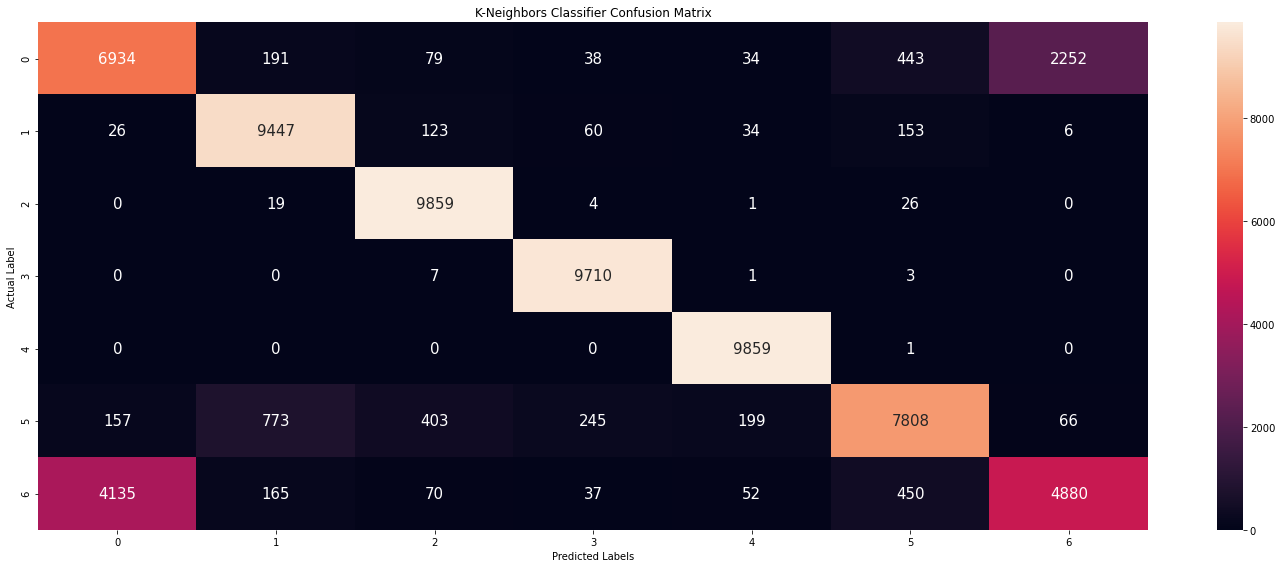

Scores: {'Accuracy Score': 0.8509, 'Micro F1 Score': 0.8509, 'Macro F1 Score': 0.8461, 'Weighted F1 Score': 0.8459, 'Micro Precision Score': 0.8509, 'Macro Precision Score': 0.8471, 'Weighted Precision Score': 0.8467, 'Micro Recall Score': 0.8509, 'Macro Recall Score': 0.8508, 'Weighted Recall Score': 0.8509, 'Run Time(secs)': 26.422}
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      9971
           1       0.97      0.98      0.97      9849
           2       0.99      1.00      0.99      9909
           3       0.99      1.00      1.00      9721
           4       0.99      1.00      1.00      9860
           5       0.95      0.91      0.93      9651
           6       0.84      0.62      0.72      9789

    accuracy                           0.92     68750
   macro avg       0.92      0.91      0.91     68750
weighted avg       0.92      0.92      0.91     68750
 
 



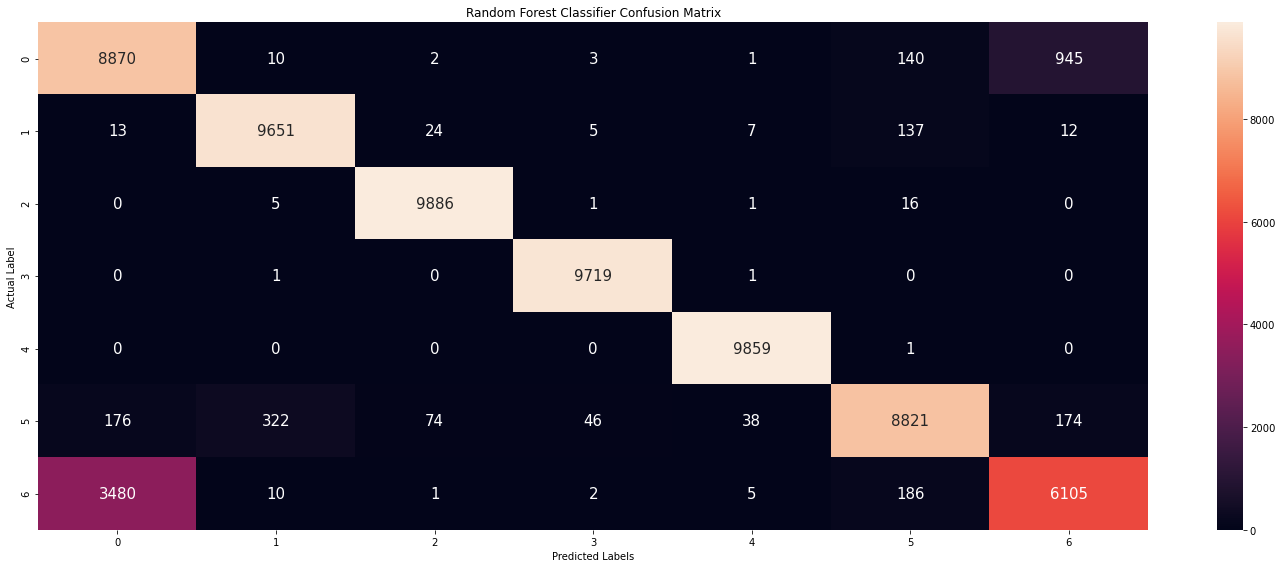

Scores: {'Accuracy Score': 0.9151, 'Micro F1 Score': 0.9151, 'Macro F1 Score': 0.9138, 'Weighted F1 Score': 0.9136, 'Micro Precision Score': 0.9151, 'Macro Precision Score': 0.9205, 'Weighted Precision Score': 0.92, 'Micro Recall Score': 0.9151, 'Macro Recall Score': 0.9149, 'Weighted Recall Score': 0.9151, 'Run Time(secs)': 6.39}


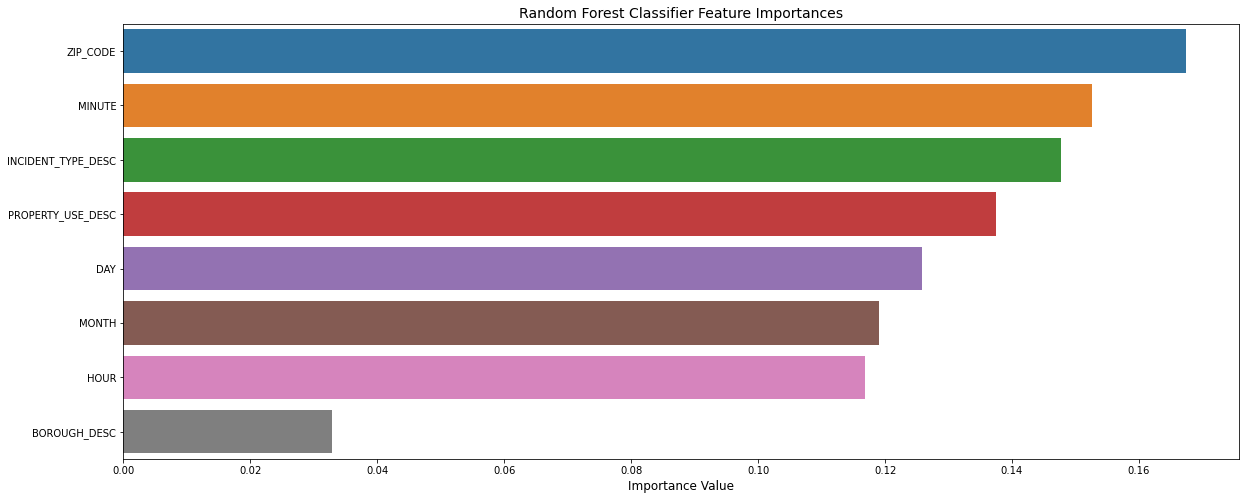

,Decision Tree Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier,Random Forest Classifier
Accuracy Score,0.8731,0.5016,0.8496,0.8509,0.9151
Micro F1 Score,0.8731,0.5016,0.8496,0.8509,0.9151
Macro F1 Score,0.8725,0.4841,0.8454,0.8461,0.9138
Weighted F1 Score,0.8723,0.4848,0.8456,0.8459,0.9136
Micro Precision Score,0.8731,0.5016,0.8496,0.8509,0.9151
Macro Precision Score,0.8723,0.4974,0.8537,0.8471,0.9205
Weighted Precision Score,0.8720,0.4976,0.8534,0.8467,0.9200
Micro Recall Score,0.8731,0.5016,0.8496,0.8509,0.9151
Macro Recall Score,0.8732,0.5006,0.8489,0.8508,0.9149
Weighted Recall Score,0.8731,0.5016,0.8496,0.8509,0.9151


In [12]:
large = pd.read_csv('large_df_s.csv', index_col=0)
large_features = large.loc[:, large.columns != 'HIGHEST_LEVEL_DESC']
large_target = large.loc[:, 'HIGHEST_LEVEL_DESC']
large_results = train_models(large_features, large_target, True)
large_results

/Users/oldvasegreenbird/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


              precision    recall  f1-score   support

           0       0.18      0.61      0.28    228874
           1       0.04      0.92      0.08       782
           2       0.03      0.80      0.06       167
           3       0.03      0.78      0.07        58
           4       0.01      0.76      0.03        54
           5       0.12      0.82      0.21     11821
           6       0.95      0.69      0.80   2276835

    accuracy                           0.68   2518591
   macro avg       0.20      0.77      0.22   2518591
weighted avg       0.88      0.68      0.75   2518591
 
 



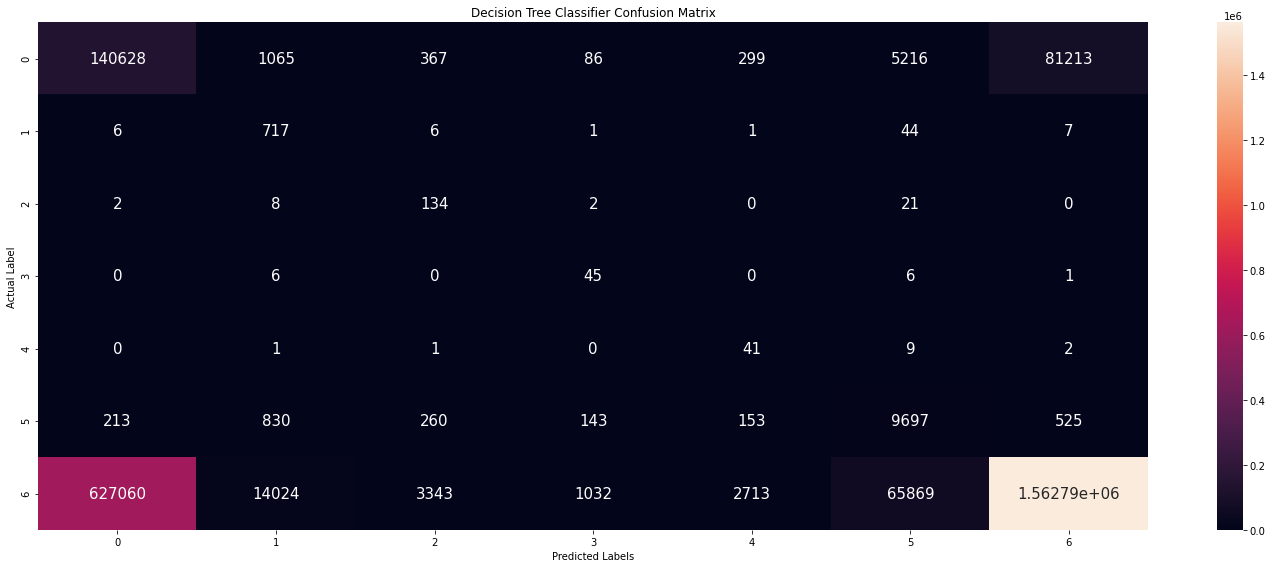

              precision    recall  f1-score   support

           0       0.18      0.78      0.29    228874
           1       0.21      0.99      0.35       782
           2       0.17      0.97      0.29       167
           3       0.09      0.95      0.17        58
           4       0.06      0.93      0.12        54
           5       0.19      0.92      0.32     11821
           6       0.97      0.63      0.76   2276835

    accuracy                           0.64   2518591
   macro avg       0.27      0.88      0.33   2518591
weighted avg       0.89      0.64      0.72   2518591
 
 



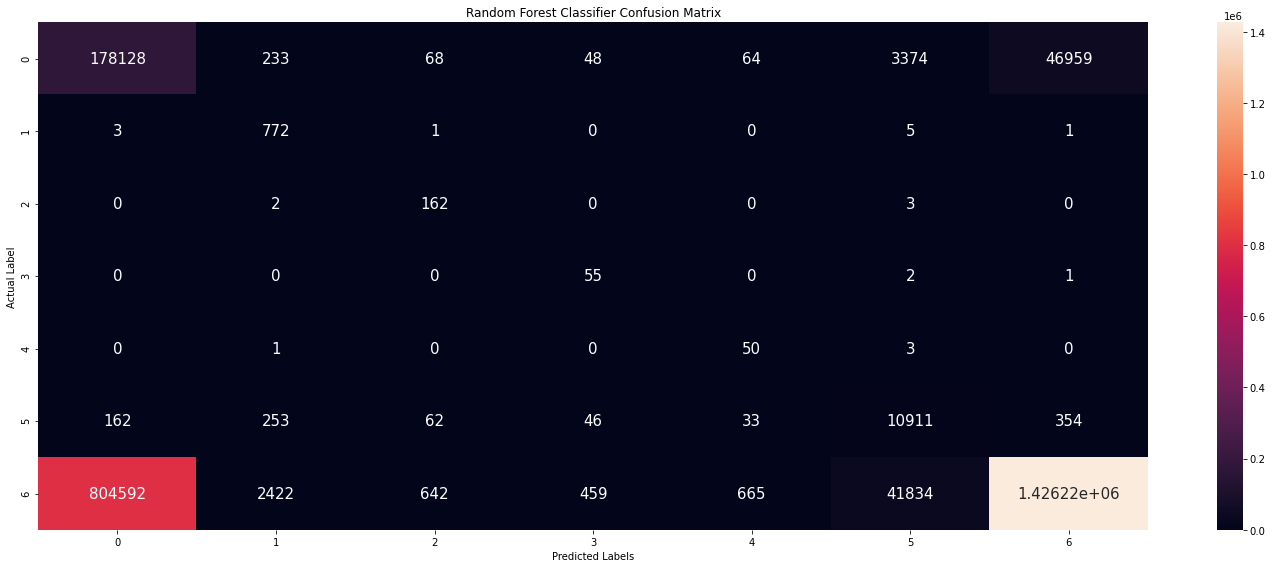

              precision    recall  f1-score   support

           0       0.17      0.77      0.27    228874
           1       0.05      0.25      0.08       782
           2       0.01      0.26      0.01       167
           3       0.01      0.62      0.01        58
           4       0.00      0.50      0.00        54
           5       0.07      0.22      0.11     11821
           6       0.96      0.59      0.73   2276835

    accuracy                           0.60   2518591
   macro avg       0.18      0.46      0.17   2518591
weighted avg       0.89      0.60      0.69   2518591
 
 



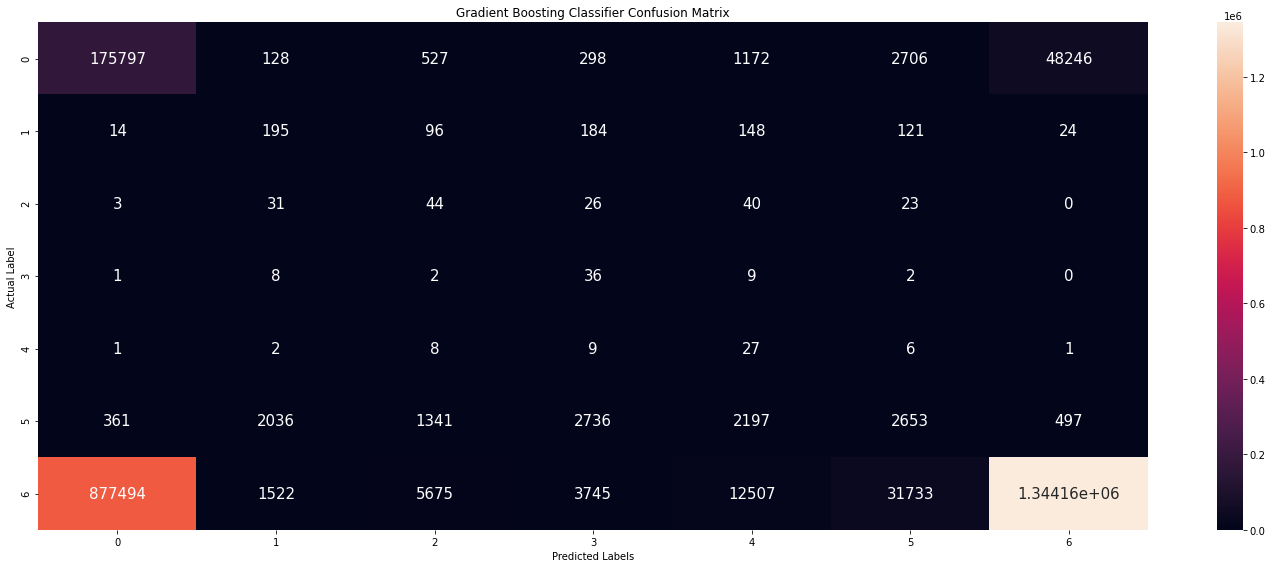

              precision    recall  f1-score   support

           0       0.18      0.76      0.29    228874
           1       0.10      0.78      0.18       782
           2       0.07      0.90      0.12       167
           3       0.04      0.95      0.08        58
           4       0.03      0.98      0.05        54
           5       0.18      0.68      0.29     11821
           6       0.97      0.63      0.76   2276835

    accuracy                           0.64   2518591
   macro avg       0.22      0.81      0.25   2518591
weighted avg       0.89      0.64      0.72   2518591
 
 



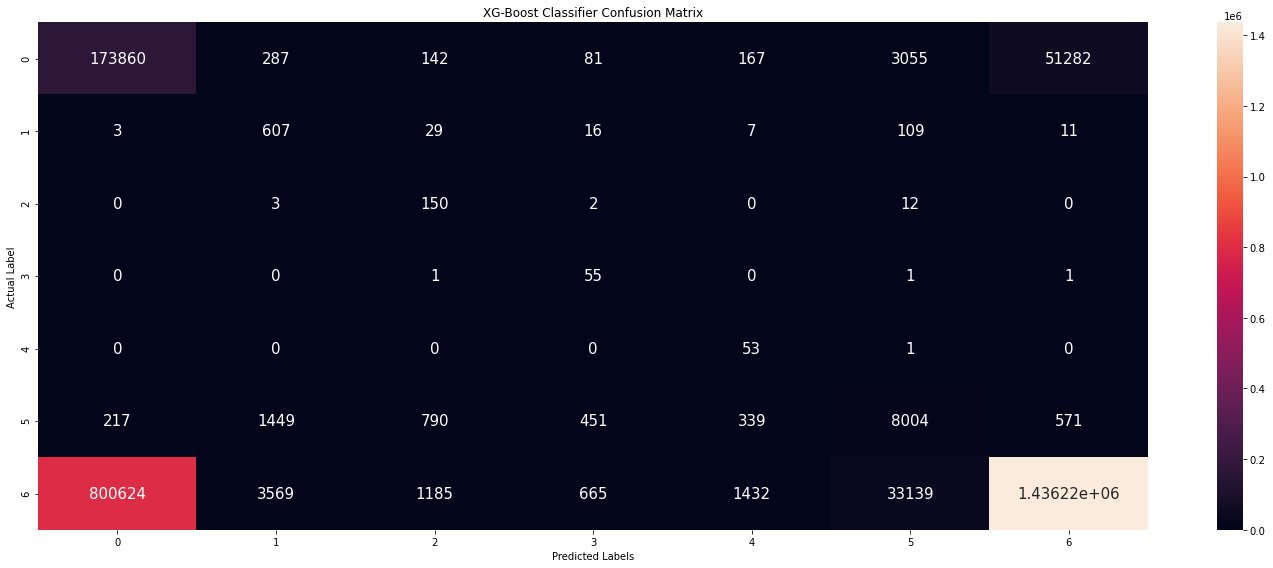

              precision    recall  f1-score   support

           0       0.14      0.67      0.23    228874
           1       0.02      1.00      0.03       782
           2       0.01      1.00      0.02       167
           3       0.01      1.00      0.01        58
           4       0.00      1.00      0.01        54
           5       0.07      0.78      0.14     11821
           6       0.95      0.50      0.65   2276835

    accuracy                           0.52   2518591
   macro avg       0.17      0.85      0.16   2518591
weighted avg       0.87      0.52      0.61   2518591
 
 



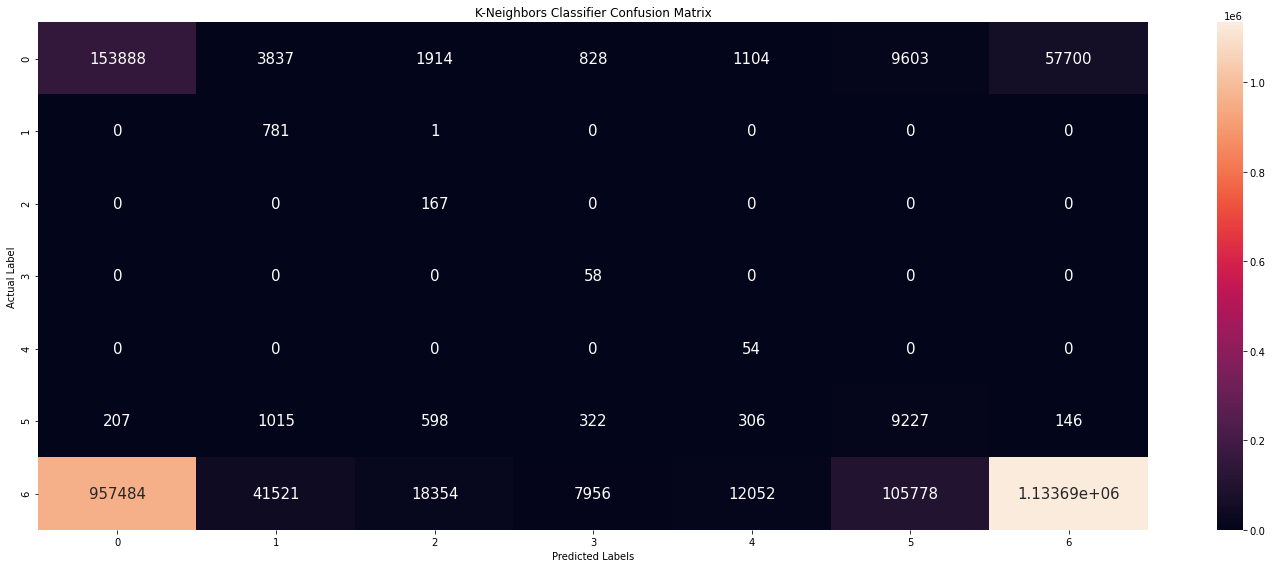

,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier
Accuracy Score,0.6806,0.6417,0.6047,0.6428,0.5153
Micro F1 Score,0.6806,0.6417,0.6047,0.6428,0.5153
Macro F1 Score,0.2178,0.3280,0.1746,0.2535,0.1554
Weighted F1 Score,0.7472,0.7159,0.6877,0.7174,0.6125
Micro Precision Score,0.6806,0.6417,0.6047,0.6428,0.5153
Macro Precision Score,0.1966,0.2683,0.1808,0.2231,0.1713
Weighted Precision Score,0.8763,0.8924,0.8879,0.8896,0.8731
Micro Recall Score,0.6806,0.6417,0.6047,0.6428,0.5153
Macro Recall Score,0.7679,0.8799,0.4595,0.8102,0.8499
Weighted Recall Score,0.6806,0.6417,0.6047,0.6428,0.5153


In [13]:
large_tester = pd.read_csv('large_df.csv', index_col=0)
large_features_tester = large_tester.loc[:, large_tester.columns != 'HIGHEST_LEVEL_DESC']
large_target_tester = large_tester.loc[:, 'HIGHEST_LEVEL_DESC']
large_results_tester = run_test_df(large_target_tester, large_features_tester)
large_results_tester

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      9971
           1       0.91      0.94      0.93      9849
           2       0.96      0.98      0.97      9909
           3       0.98      1.00      0.99      9721
           4       0.98      1.00      0.99      9860
           5       0.88      0.83      0.86      9651
           6       0.68      0.68      0.68      9789

    accuracy                           0.87     68750
   macro avg       0.87      0.87      0.87     68750
weighted avg       0.87      0.87      0.87     68750
 
 



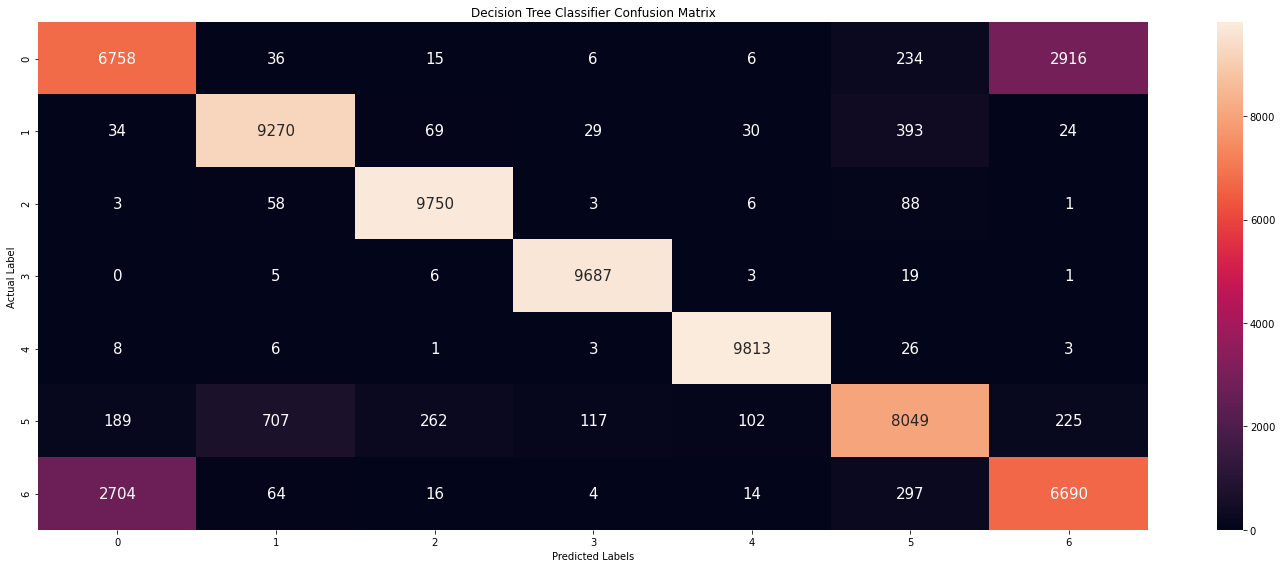

Scores: {'Accuracy Score': 0.873, 'Micro F1 Score': 0.873, 'Macro F1 Score': 0.8724, 'Weighted F1 Score': 0.8722, 'Micro Precision Score': 0.873, 'Macro Precision Score': 0.872, 'Weighted Precision Score': 0.8717, 'Micro Recall Score': 0.873, 'Macro Recall Score': 0.8732, 'Weighted Recall Score': 0.873, 'Run Time(secs)': 1.353}
              precision    recall  f1-score   support

           0       0.65      0.87      0.74      9971
           1       0.33      0.33      0.33      9849
           2       0.43      0.29      0.35      9909
           3       0.49      0.64      0.56      9721
           4       0.46      0.65      0.54      9860
           5       0.42      0.21      0.28      9651
           6       0.76      0.59      0.66      9789

    accuracy                           0.51     68750
   macro avg       0.51      0.51      0.49     68750
weighted avg       0.51      0.51      0.50     68750
 
 



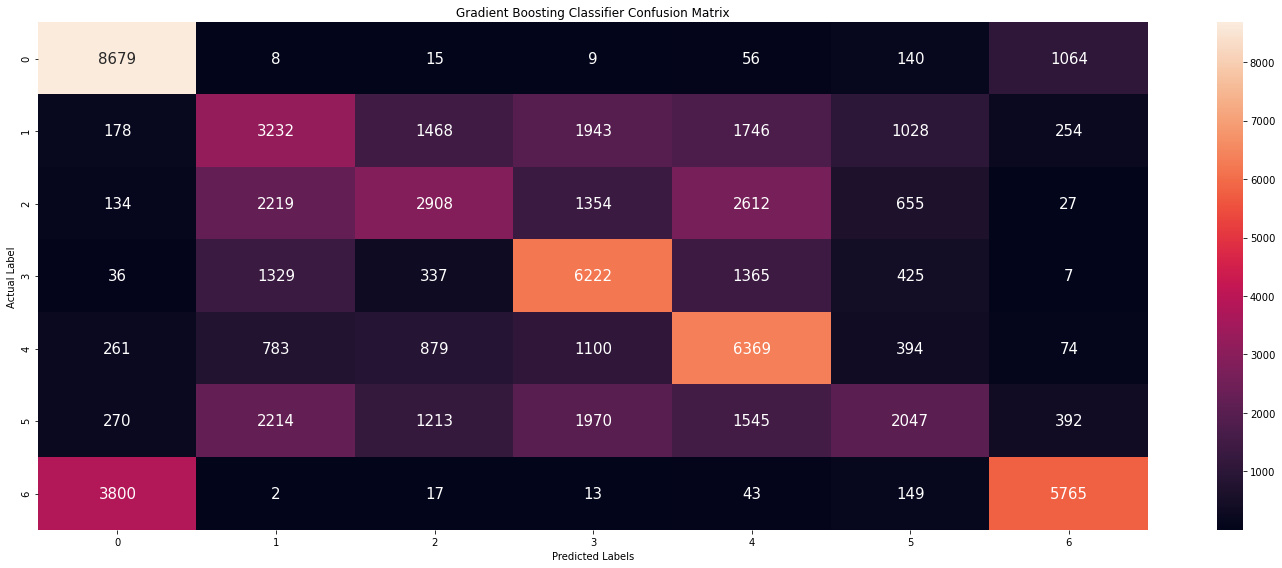

Scores: {'Accuracy Score': 0.5123, 'Micro F1 Score': 0.5123, 'Macro F1 Score': 0.4948, 'Weighted F1 Score': 0.4955, 'Micro Precision Score': 0.5123, 'Macro Precision Score': 0.5065, 'Weighted Precision Score': 0.5067, 'Micro Recall Score': 0.5123, 'Macro Recall Score': 0.5113, 'Weighted Recall Score': 0.5123, 'Run Time(secs)': 14.257}
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      9971
           1       0.83      0.82      0.83      9849
           2       0.87      0.94      0.90      9909
           3       0.92      0.99      0.95      9721
           4       0.94      0.99      0.96      9860
           5       0.82      0.66      0.73      9651
           6       0.87      0.62      0.72      9789

    accuracy                           0.85     68750
   macro avg       0.85      0.85      0.84     68750
weighted avg       0.85      0.85      0.84     68750
 
 



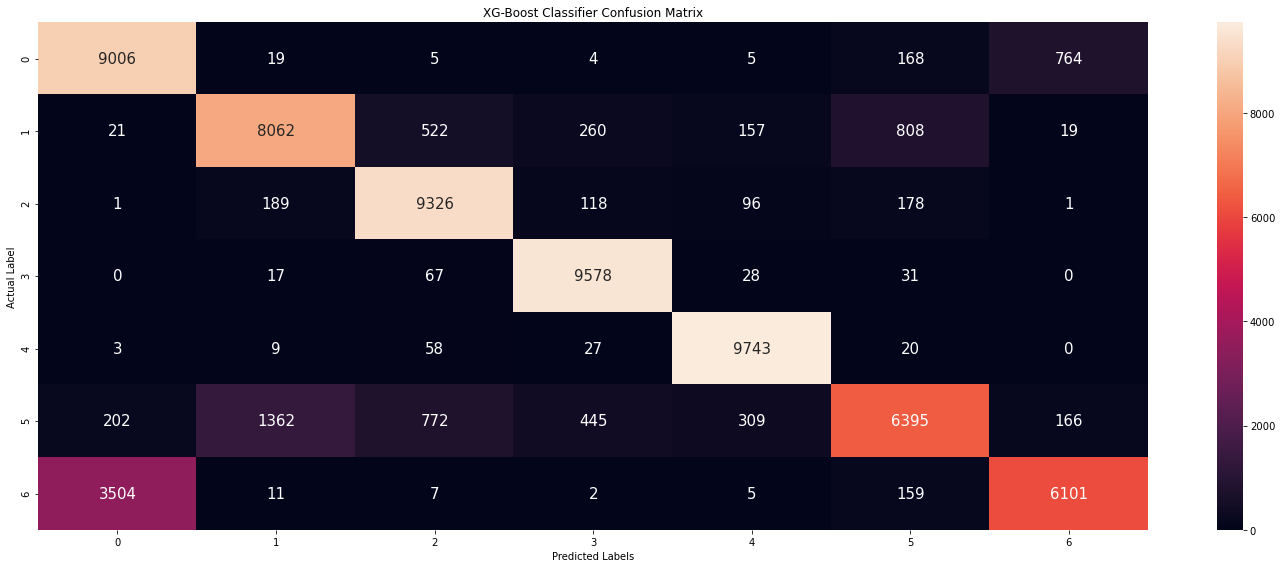

Scores: {'Accuracy Score': 0.8467, 'Micro F1 Score': 0.8467, 'Macro F1 Score': 0.8423, 'Weighted F1 Score': 0.8425, 'Micro Precision Score': 0.8467, 'Macro Precision Score': 0.851, 'Weighted Precision Score': 0.8508, 'Micro Recall Score': 0.8467, 'Macro Recall Score': 0.846, 'Weighted Recall Score': 0.8467, 'Run Time(secs)': 24.254}
              precision    recall  f1-score   support

           0       0.62      0.70      0.65      9971
           1       0.89      0.96      0.92      9849
           2       0.93      0.99      0.96      9909
           3       0.96      1.00      0.98      9721
           4       0.97      1.00      0.98      9860
           5       0.88      0.81      0.84      9651
           6       0.68      0.50      0.57      9789

    accuracy                           0.85     68750
   macro avg       0.85      0.85      0.85     68750
weighted avg       0.85      0.85      0.85     68750
 
 



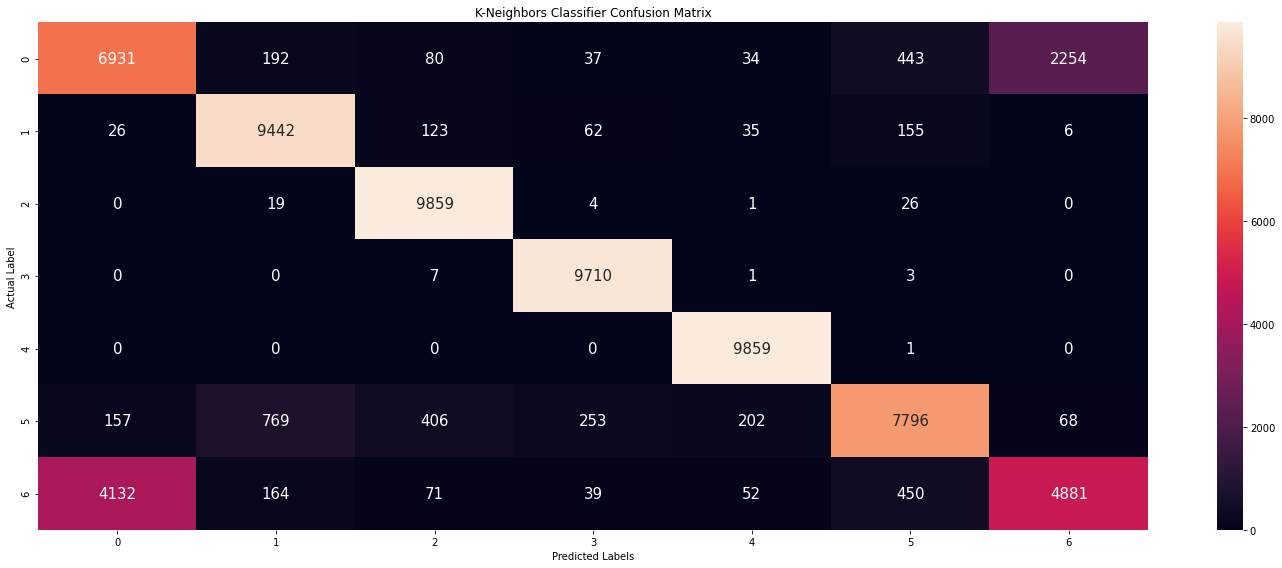

Scores: {'Accuracy Score': 0.8506, 'Micro F1 Score': 0.8506, 'Macro F1 Score': 0.8458, 'Weighted F1 Score': 0.8456, 'Micro Precision Score': 0.8506, 'Macro Precision Score': 0.8468, 'Weighted Precision Score': 0.8463, 'Micro Recall Score': 0.8506, 'Macro Recall Score': 0.8506, 'Weighted Recall Score': 0.8506, 'Run Time(secs)': 21.889}
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      9971
           1       0.97      0.98      0.97      9849
           2       0.99      1.00      0.99      9909
           3       0.99      1.00      1.00      9721
           4       0.99      1.00      1.00      9860
           5       0.95      0.92      0.93      9651
           6       0.85      0.63      0.72      9789

    accuracy                           0.92     68750
   macro avg       0.92      0.92      0.91     68750
weighted avg       0.92      0.92      0.91     68750
 
 



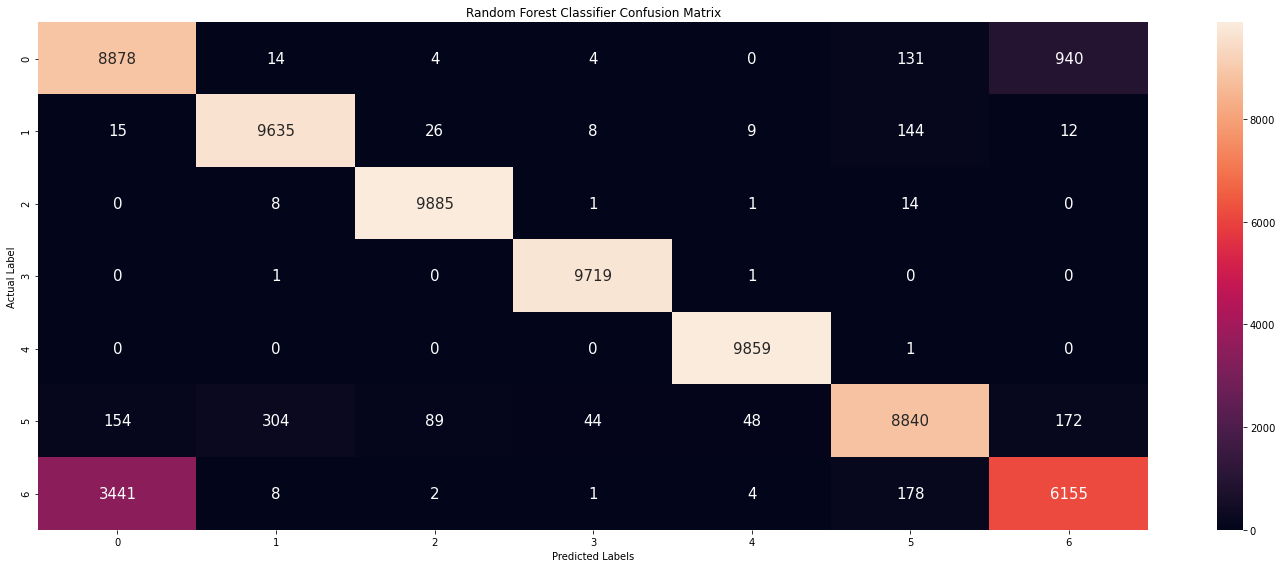

Scores: {'Accuracy Score': 0.9159, 'Micro F1 Score': 0.9159, 'Macro F1 Score': 0.9147, 'Weighted F1 Score': 0.9146, 'Micro Precision Score': 0.9159, 'Macro Precision Score': 0.9212, 'Weighted Precision Score': 0.9207, 'Micro Recall Score': 0.9159, 'Macro Recall Score': 0.9158, 'Weighted Recall Score': 0.9159, 'Run Time(secs)': 6.202}


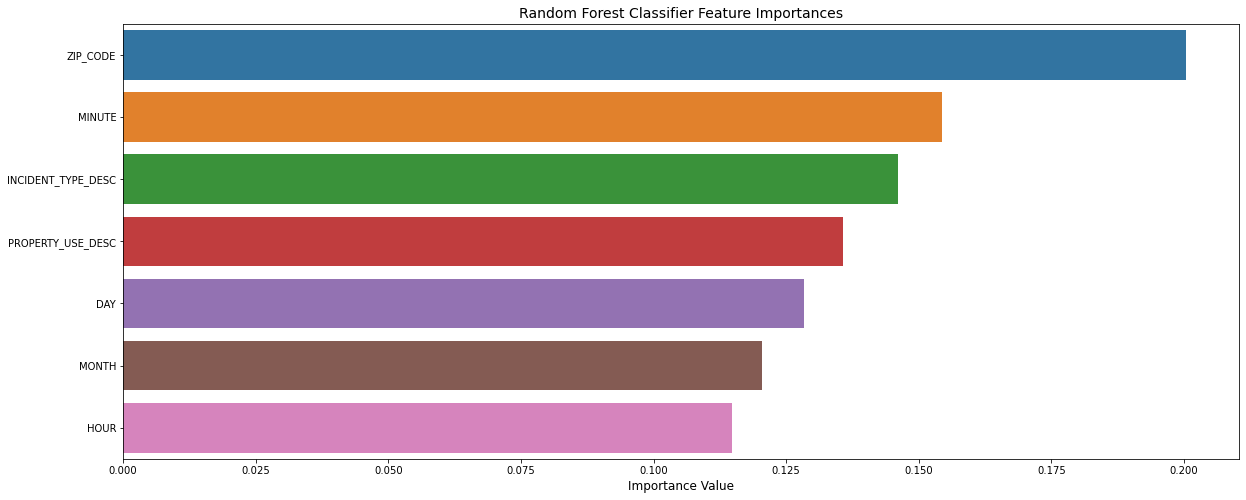

,Decision Tree Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier,Random Forest Classifier
Accuracy Score,0.8730,0.5123,0.8467,0.8506,0.9159
Micro F1 Score,0.8730,0.5123,0.8467,0.8506,0.9159
Macro F1 Score,0.8724,0.4948,0.8423,0.8458,0.9147
Weighted F1 Score,0.8722,0.4955,0.8425,0.8456,0.9146
Micro Precision Score,0.8730,0.5123,0.8467,0.8506,0.9159
Macro Precision Score,0.8720,0.5065,0.8510,0.8468,0.9212
Weighted Precision Score,0.8717,0.5067,0.8508,0.8463,0.9207
Micro Recall Score,0.8730,0.5123,0.8467,0.8506,0.9159
Macro Recall Score,0.8732,0.5113,0.8460,0.8506,0.9158
Weighted Recall Score,0.8730,0.5123,0.8467,0.8506,0.9159


In [14]:
large_removed_columns = pd.read_csv('large_df_s.csv', index_col=0)
large_features_removed = large[['INCIDENT_TYPE_DESC', 'PROPERTY_USE_DESC', 'ZIP_CODE','MONTH', 'DAY', 'HOUR', 'MINUTE']]
large_target_removed = large.loc[:, 'HIGHEST_LEVEL_DESC']
large_results_removed = train_models(large_features_removed, large_target_removed)
large_results_removed

              precision    recall  f1-score   support

           0       0.18      0.61      0.28    228874
           1       0.04      0.92      0.08       782
           2       0.03      0.80      0.06       167
           3       0.04      0.88      0.07        58
           4       0.01      0.78      0.03        54
           5       0.12      0.82      0.21     11821
           6       0.95      0.69      0.80   2276835

    accuracy                           0.68   2518591
   macro avg       0.20      0.79      0.22   2518591
weighted avg       0.88      0.68      0.75   2518591
 
 



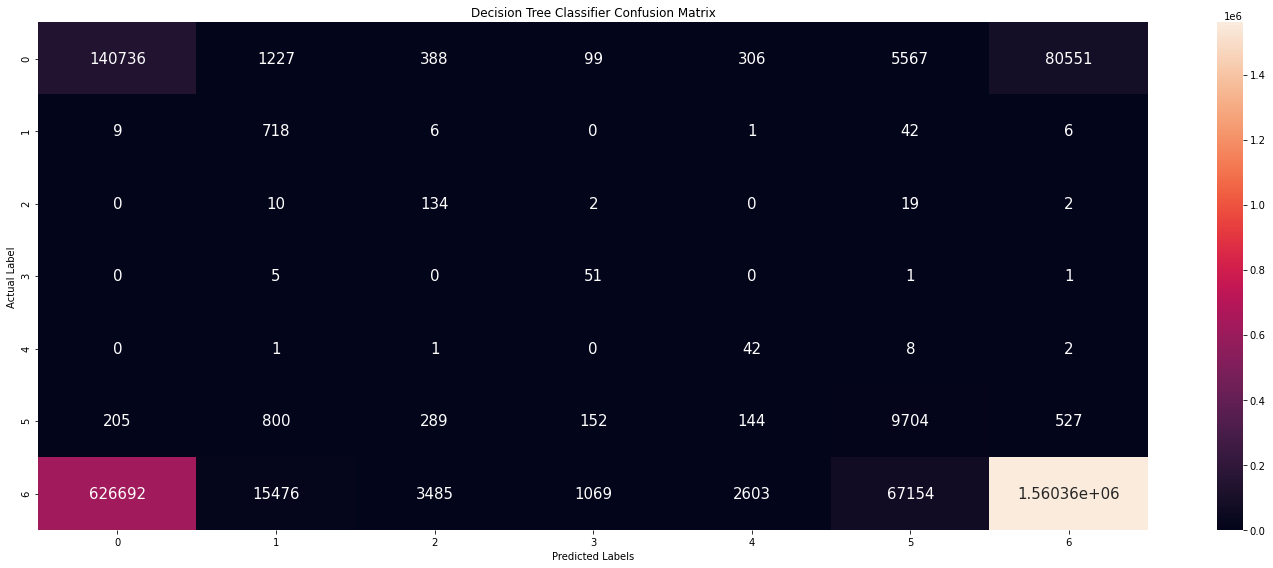

              precision    recall  f1-score   support

           0       0.18      0.78      0.29    228874
           1       0.21      0.99      0.35       782
           2       0.17      0.99      0.29       167
           3       0.10      0.98      0.19        58
           4       0.06      0.94      0.11        54
           5       0.20      0.92      0.33     11821
           6       0.97      0.63      0.76   2276835

    accuracy                           0.64   2518591
   macro avg       0.27      0.89      0.33   2518591
weighted avg       0.89      0.64      0.72   2518591
 
 



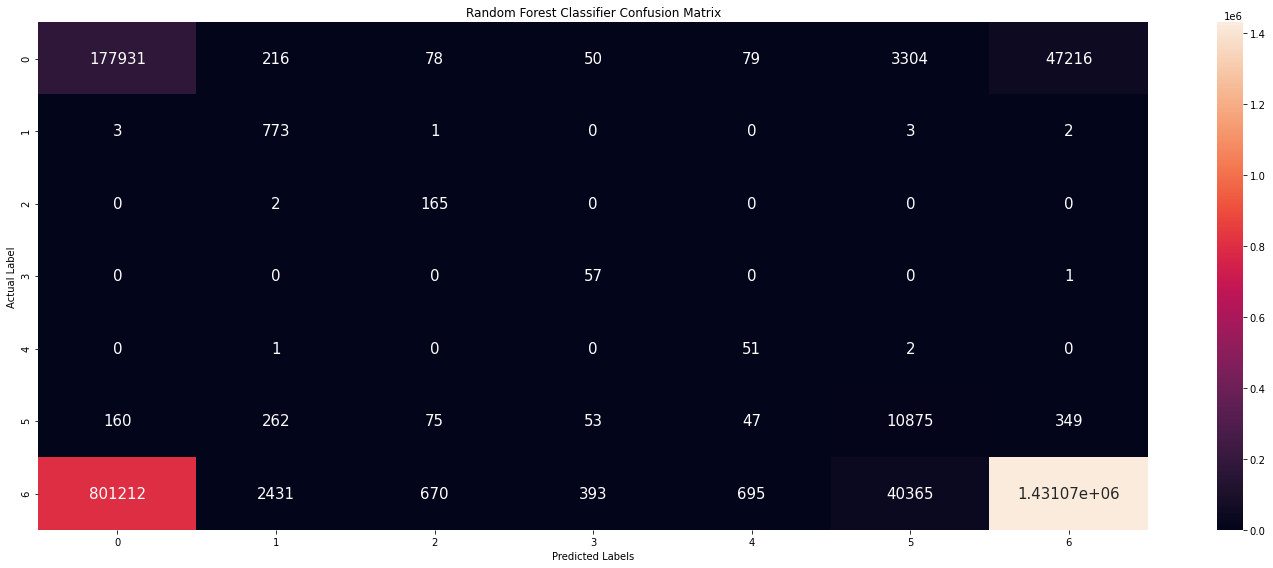

              precision    recall  f1-score   support

           0       0.17      0.77      0.27    228874
           1       0.05      0.28      0.09       782
           2       0.01      0.27      0.02       167
           3       0.01      0.60      0.01        58
           4       0.00      0.52      0.00        54
           5       0.06      0.22      0.09     11821
           6       0.96      0.59      0.73   2276835

    accuracy                           0.61   2518591
   macro avg       0.18      0.46      0.17   2518591
weighted avg       0.89      0.61      0.69   2518591
 
 



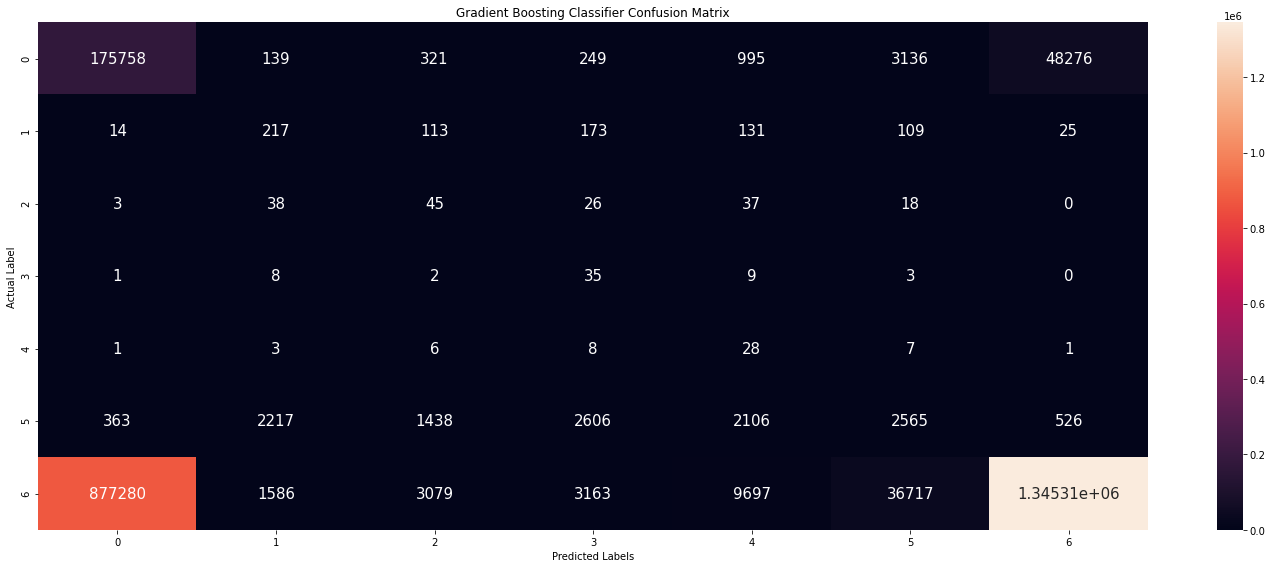

              precision    recall  f1-score   support

           0       0.18      0.77      0.29    228874
           1       0.10      0.80      0.18       782
           2       0.06      0.87      0.11       167
           3       0.04      0.97      0.08        58
           4       0.02      0.98      0.04        54
           5       0.18      0.66      0.28     11821
           6       0.97      0.63      0.76   2276835

    accuracy                           0.64   2518591
   macro avg       0.22      0.81      0.25   2518591
weighted avg       0.89      0.64      0.71   2518591
 
 



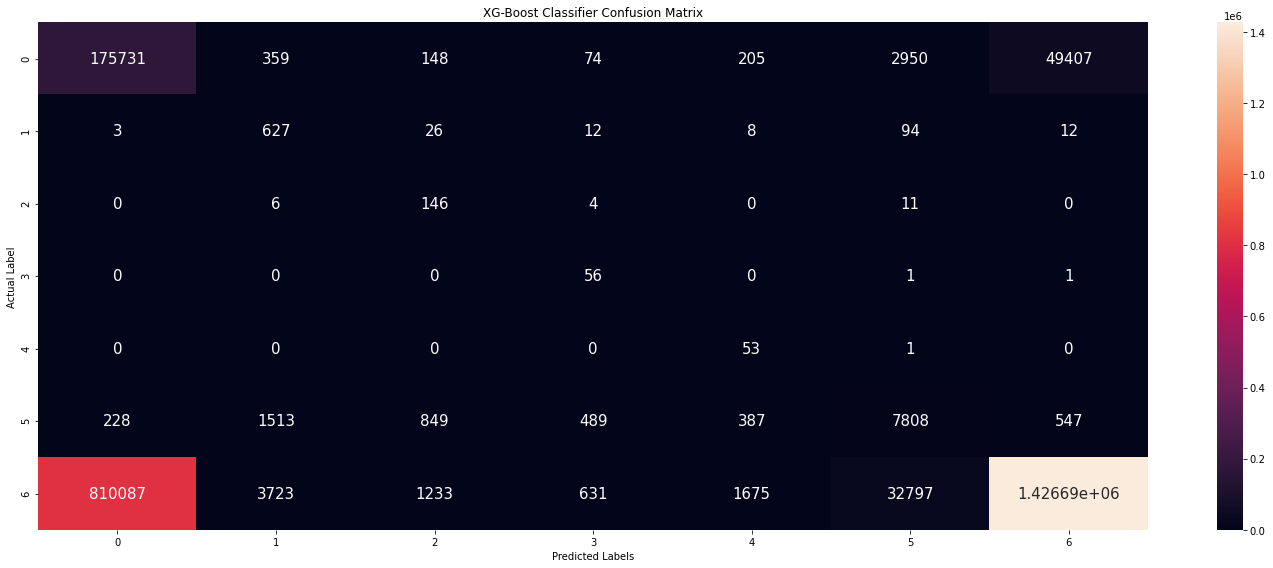

              precision    recall  f1-score   support

           0       0.14      0.67      0.23    228874
           1       0.02      1.00      0.03       782
           2       0.01      1.00      0.02       167
           3       0.01      1.00      0.01        58
           4       0.00      1.00      0.01        54
           5       0.07      0.78      0.14     11821
           6       0.95      0.50      0.65   2276835

    accuracy                           0.52   2518591
   macro avg       0.17      0.85      0.16   2518591
weighted avg       0.87      0.52      0.61   2518591
 
 



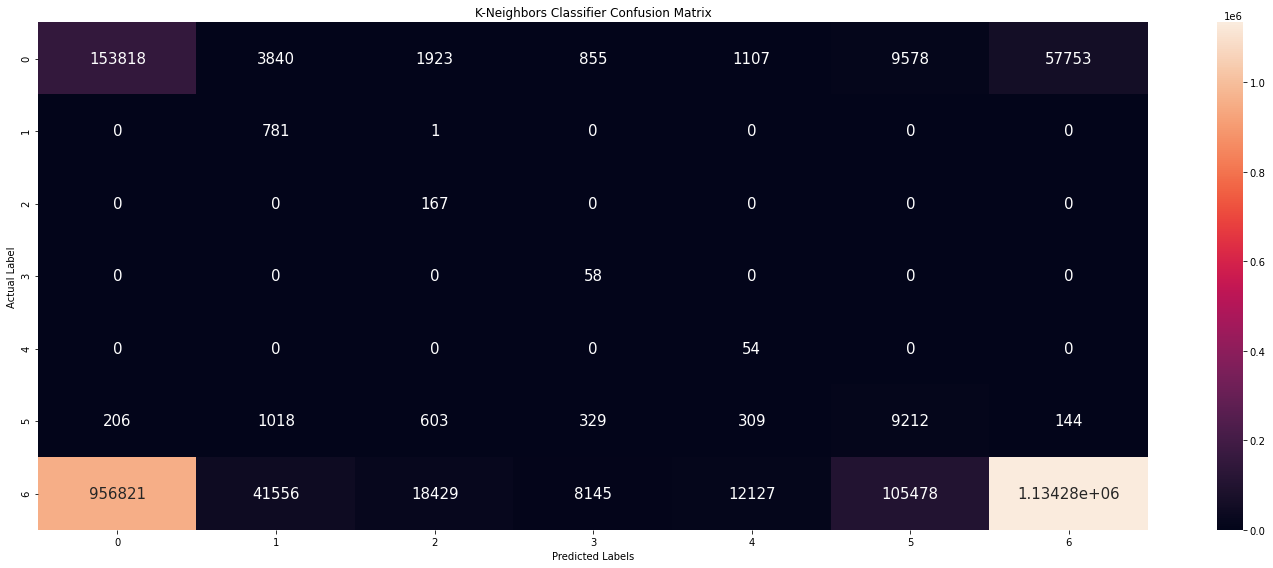

,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier
Accuracy Score,0.6796,0.6436,0.6051,0.6397,0.5155
Micro F1 Score,0.6796,0.6436,0.6051,0.6397,0.5155
Macro F1 Score,0.2169,0.3304,0.1745,0.2504,0.1553
Weighted F1 Score,0.7467,0.7174,0.6880,0.7149,0.6127
Micro Precision Score,0.6796,0.6436,0.6051,0.6397,0.5155
Macro Precision Score,0.1961,0.2696,0.1801,0.2217,0.1712
Weighted Precision Score,0.8766,0.8925,0.8878,0.8905,0.8730
Micro Recall Score,0.6796,0.6436,0.6051,0.6397,0.5155
Macro Recall Score,0.7855,0.8899,0.4635,0.8111,0.8498
Weighted Recall Score,0.6796,0.6436,0.6051,0.6397,0.5155


In [17]:
large_features_tester_removed = large_tester[['INCIDENT_TYPE_DESC', 'PROPERTY_USE_DESC', 'ZIP_CODE','MONTH', 'DAY', 'HOUR', 'MINUTE']]
large_target_tester_removed = large_tester.loc[:, 'HIGHEST_LEVEL_DESC']
large_results_tester_removed = run_test_df(large_target_tester_removed, large_features_tester_removed)
large_results_tester_removed 